In [1]:
import pandas as pd
from carga_datos import  columnas_ndvi
import matplotlib.pyplot as plt
import numpy as np
import ftfy
import geopandas as gpd
import json

green_spaces_data cargada


# Datos NDVI

Cargar BDD de NDVI

In [2]:
df_summer = pd.read_csv("green_spaces_data/summerNDVI_corregido.csv",  encoding='utf-8')
df_winter = pd.read_csv("green_spaces_data/winterNDVI_corregido.csv",  encoding='utf-8')

Seleccionar Region de Vaplaraíso

In [3]:
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"]
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"]

Ordenamos columnas de NDVI por orden cronológico

In [4]:
def extraer_numero(columna):
    return int(columna.split('_')[0])

# Ordenamos las columnas
ordered_ndvi_columns = sorted(columnas_ndvi, key=extraer_numero)

# Summer
# Reorganizamos las columnas, primero las ordenadas NDVI y luego el resto de las columnas
df_summer_valparaiso = df_summer_valparaiso[ordered_ndvi_columns + [col for col in df_summer_valparaiso.columns if '_NDVI' not in col]]

# Winter
df_winter_valparaiso = df_winter_valparaiso[ordered_ndvi_columns + [col for col in df_winter_valparaiso.columns if '_NDVI' not in col]]


Imprimir DataFrame de invierno

In [ ]:
print("\nWinter DataFrame Región de Valparaíso:")
#df_winter_valparaiso

Creamos copias

In [5]:
df_summer_valparaiso_copy = df_summer_valparaiso.copy()
df_winter_valparaiso_copy =df_winter_valparaiso.copy()

# Tablas con minimo, maximos y promedio de todas las comunas

## Verano

In [6]:
df_summer_valparaiso_copy['MIN'] = df_summer_valparaiso_copy[columnas_ndvi].min(axis=1)
df_summer_valparaiso_copy['MAX'] = df_summer_valparaiso_copy[columnas_ndvi].max(axis=1)
df_summer_valparaiso_copy['MEAN'] = df_summer_valparaiso_copy[columnas_ndvi].mean(axis=1)
pd.set_option('display.max_rows', None)
df_summer_valparaiso_copy[['MIN', 'MAX', 'MEAN']] = df_summer_valparaiso_copy[['MIN', 'MAX', 'MEAN']].round(2)

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_9547/2410648158.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_summer_valparaiso_tabla = df_summer_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


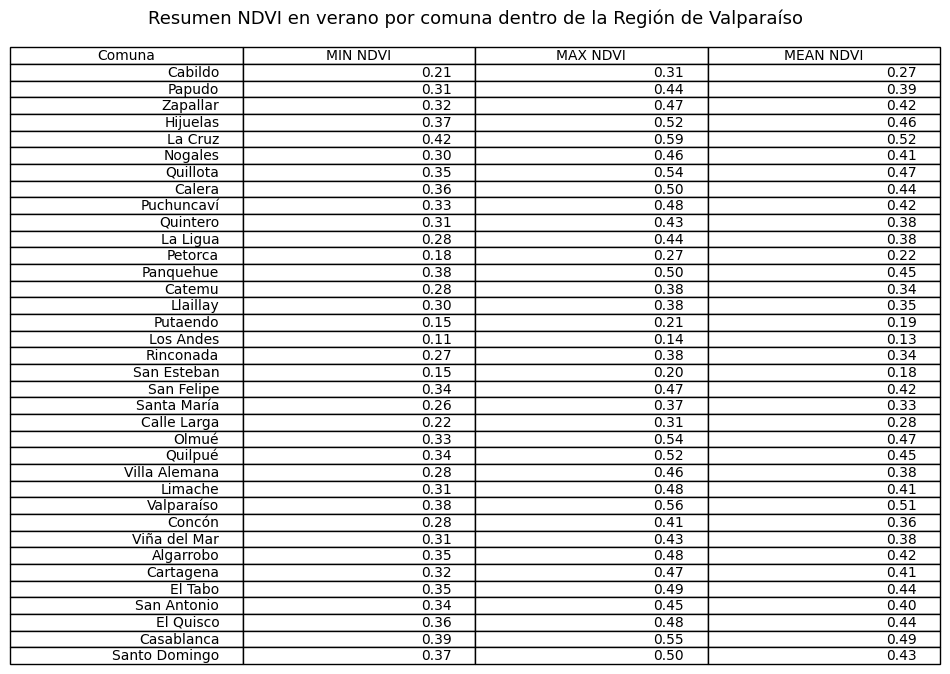

In [7]:
df_summer_valparaiso_tabla = df_summer_valparaiso_copy[['NOM_COM','MIN', 'MAX', 'MEAN']]
df_summer_valparaiso_tabla = df_summer_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crea la figura
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')

plt.title('Resumen NDVI en verano por comuna dentro de la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_summer_valparaiso_tabla.values, colLabels=['Comuna', 'MIN NDVI', 'MAX NDVI', 'MEAN NDVI'], loc='center')
plt.show()

## Invierno

In [58]:
df_winter_valparaiso_copy['MIN'] = df_winter_valparaiso_copy[columnas_ndvi].min(axis=1)
df_winter_valparaiso_copy['MAX'] = df_winter_valparaiso_copy[columnas_ndvi].max(axis=1)
df_winter_valparaiso_copy['MEAN'] = df_winter_valparaiso_copy[columnas_ndvi].mean(axis=1)
pd.set_option('display.max_rows', None)
df_winter_valparaiso_copy[['MIN', 'MAX', 'MEAN']] = df_winter_valparaiso_copy[['MIN', 'MAX', 'MEAN']].round(3)

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_5591/3576013569.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_winter_valparaiso_tabla = df_winter_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


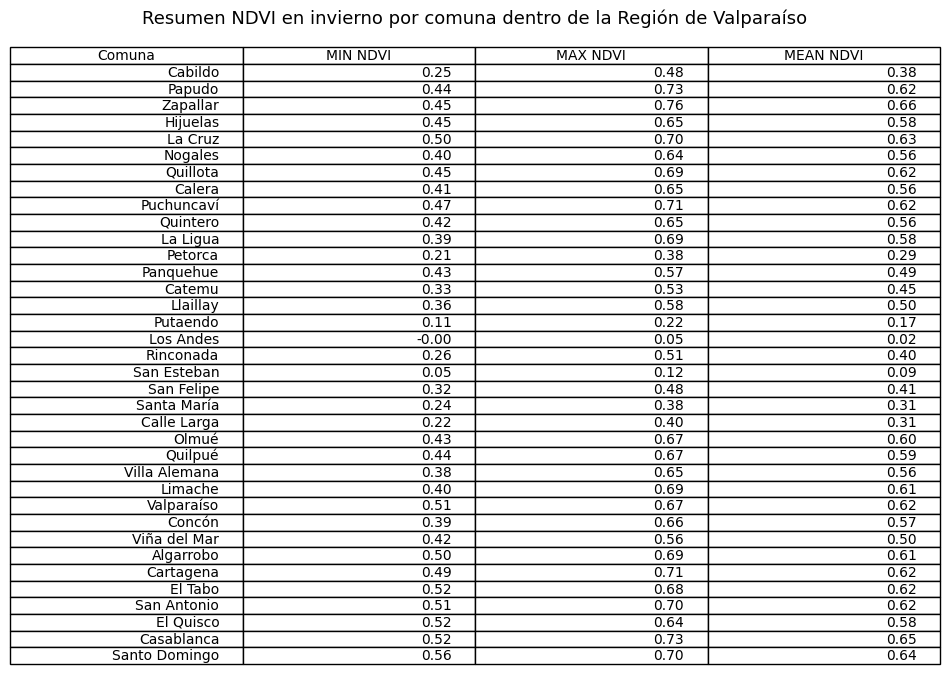

In [21]:
df_winter_valparaiso_tabla = df_winter_valparaiso_copy[['NOM_COM','MIN', 'MAX', 'MEAN']]
df_winter_valparaiso_tabla = df_winter_valparaiso_tabla.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crea la figura
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño de la imagen

ax.axis('tight')
ax.axis('off')

plt.title('Resumen NDVI en invierno por comuna dentro de la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_winter_valparaiso_tabla.values, colLabels=['Comuna', 'MIN NDVI', 'MAX NDVI', 'MEAN NDVI'], loc='center')
plt.show()

# Tabla comparativa

/var/folders/mc/2x27ctzd463ffrmth0gvlb180000gn/T/ipykernel_5591/1683042139.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_comparado = df_comparado.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


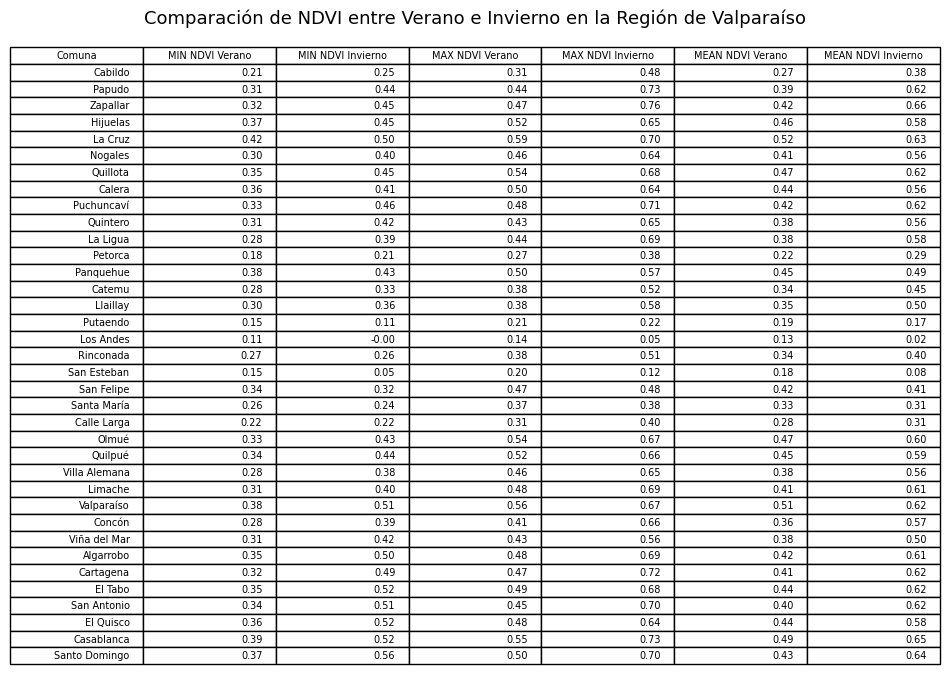

In [24]:
# Crear un DataFrame comparativo
df_comparado = pd.DataFrame({
    'Comuna': df_summer_valparaiso_copy['NOM_COM'],
    'MIN NDVI Verano': df_summer_valparaiso_copy['MIN'],
    'MIN NDVI Invierno': df_winter_valparaiso_copy['MIN'],
    'MAX NDVI Verano': df_summer_valparaiso_copy['MAX'],
    'MAX NDVI Invierno': df_winter_valparaiso_copy['MAX'],
    'MEAN NDVI Verano': df_summer_valparaiso_copy['MEAN'],
    'MEAN NDVI Invierno': df_winter_valparaiso_copy['MEAN']
})

# Redondear a 2 decimales
df_comparado[['MIN NDVI Verano', 'MIN NDVI Invierno', 'MAX NDVI Verano', 'MAX NDVI Invierno', 'MEAN NDVI Verano', 'MEAN NDVI Invierno']] = df_comparado[['MIN NDVI Verano', 'MIN NDVI Invierno', 'MAX NDVI Verano', 'MAX NDVI Invierno', 'MEAN NDVI Verano', 'MEAN NDVI Invierno']].round(2)
df_comparado = df_comparado.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')

plt.title('Comparación de NDVI entre Verano e Invierno en la Región de Valparaíso', fontsize=13, y=1.2)

tabla = ax.table(cellText=df_comparado.values, 
                colLabels=df_comparado.columns, 
                loc='center')

plt.show()

## Tablas de la Región de Valparaíso

In [21]:
print("Tabla VERANO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_summer_valparaiso_copy


Tabla VERANO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo 


,0_NDVI,1_NDVI,2_NDVI,3_NDVI,4_NDVI,5_NDVI,6_NDVI,7_NDVI,8_NDVI,9_NDVI,...,18_NDVI,19_NDVI,20_NDVI,COD_COMUNA,NOM_COM,NOM_PROV,NOM_REG,MIN,MAX,MEAN
0,0.310635,0.269488,0.297997,0.306215,0.306456,0.272642,0.297844,0.291061,0.271792,0.258523,...,0.252539,0.211505,0.240275,5402,Cabildo,Petorca,Valparaíso,0.209,0.311,0.268
1,0.427025,0.391832,0.417154,0.432864,0.425124,0.372350,0.417185,0.408197,0.399945,0.380231,...,0.377249,0.313083,0.372458,5403,Papudo,Petorca,Valparaíso,0.309,0.442,0.391
2,0.447167,0.403855,0.445768,0.466525,0.452649,0.386064,0.458908,0.432370,0.439159,0.400527,...,0.404163,0.320224,0.407111,5405,Zapallar,Petorca,Valparaíso,0.320,0.471,0.420
3,0.468601,0.433262,0.489367,0.498958,0.503667,0.439897,0.487960,0.487358,0.482670,0.459998,...,0.443781,0.391512,0.416207,5503,Hijuelas,Quillota,Valparaíso,0.372,0.519,0.464
4,0.501512,0.488890,0.528063,0.546749,0.550561,0.504899,0.537330,0.535245,0.533075,0.517064,...,0.490078,0.438614,0.494383,5504,La Cruz,Quillota,Valparaíso,0.423,0.589,0.516
5,0.425358,0.382764,0.430356,0.459243,0.450961,0.376402,0.437336,0.417732,0.418687,0.385173,...,0.384047,0.325489,0.379225,5506,Nogales,Quillota,Valparaíso,0.302,0.462,0.408
6,0.487655,0.460038,0.497098,0.515160,0.512268,0.458155,0.500862,0.487490,0.484022,0.450711,...,0.433612,0.364167,0.432022,5501,Quillota,Quillota,Valparaíso,0.354,0.540,0.468
7,0.453131,0.424767,0.465806,0.473177,0.475203,0.432355,0.469972,0.468602,0.459083,0.446789,...,0.415908,0.365879,0.404677,5502,Calera,Quillota,Valparaíso,0.359,0.505,0.444
8,0.425312,0.391143,0.434939,0.465052,0.449210,0.392366,0.445222,0.412604,0.426137,0.395629,...,0.419410,0.331956,0.427697,5105,Puchuncaví,Valparaíso,Valparaíso,0.332,0.478,0.418
9,0.389686,0.367314,0.396314,0.412003,0.403898,0.373625,0.404944,0.380150,0.387159,0.368981,...,0.382671,0.308899,0.375001,5107,Quintero,Valparaíso,Valparaíso,0.309,0.425,0.378


In [22]:
print("Tabla INVIERNO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_winter_valparaiso_copy

Tabla INVIERNO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo 


,0_NDVI,1_NDVI,2_NDVI,3_NDVI,4_NDVI,5_NDVI,6_NDVI,7_NDVI,8_NDVI,9_NDVI,...,18_NDVI,19_NDVI,20_NDVI,COD_COMUNA,NOM_COM,NOM_PROV,NOM_REG,MIN,MAX,MEAN
0,0.446822,0.436808,0.437979,0.444257,0.423081,0.361638,0.441672,0.391123,0.397589,0.358521,...,0.335004,0.261843,0.290886,5402,Cabildo,Petorca,Valparaíso,0.254,0.476,0.383
1,0.672230,0.660958,0.695314,0.693673,0.681504,0.581650,0.693367,0.625655,0.640417,0.619167,...,0.536953,0.435921,0.553997,5403,Papudo,Petorca,Valparaíso,0.436,0.727,0.622
2,0.712100,0.700140,0.728765,0.728692,0.705668,0.617892,0.727309,0.653420,0.673148,0.654520,...,0.568661,0.453202,0.581174,5405,Zapallar,Petorca,Valparaíso,0.453,0.755,0.655
3,0.610514,0.600335,0.623020,0.641891,0.618586,0.570535,0.604045,0.587345,0.586238,0.566533,...,0.505919,0.446330,0.546609,5503,Hijuelas,Quillota,Valparaíso,0.446,0.648,0.580
4,0.655724,0.645309,0.672610,0.683605,0.669459,0.625158,0.677502,0.642741,0.642834,0.637899,...,0.560269,0.501836,0.598075,5504,La Cruz,Quillota,Valparaíso,0.502,0.702,0.633
5,0.605342,0.585070,0.607043,0.626218,0.594923,0.543517,0.597760,0.559474,0.558612,0.545680,...,0.464168,0.395001,0.498792,5506,Nogales,Quillota,Valparaíso,0.395,0.637,0.556
6,0.643761,0.649753,0.672354,0.681322,0.658730,0.599549,0.659627,0.620997,0.624131,0.610708,...,0.533925,0.448450,0.606758,5501,Quillota,Quillota,Valparaíso,0.448,0.685,0.617
7,0.597479,0.575061,0.615499,0.632762,0.601939,0.545787,0.602202,0.574150,0.578013,0.568861,...,0.502542,0.409534,0.520607,5502,Calera,Quillota,Valparaíso,0.410,0.645,0.565
8,0.641562,0.642762,0.669108,0.680460,0.662112,0.586645,0.665923,0.611720,0.623817,0.618132,...,0.539143,0.465048,0.599122,5105,Puchuncaví,Valparaíso,Valparaíso,0.465,0.713,0.621
9,0.561672,0.590785,0.616879,0.625842,0.602672,0.517088,0.600214,0.551805,0.559311,0.563081,...,0.513054,0.424521,0.578424,5107,Quintero,Valparaíso,Valparaíso,0.425,0.650,0.565


## Tablas de las Provincias de Valparaíso

### Tablas de la Provincia de Valparaíso

In [23]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Valparaíso 


In [24]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Valparaíso 


### Tablas de la Provincia de Petorca

In [25]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Petorca")
df_summer_provincia_petorca = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Petorca']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Petorca


In [26]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Petorca")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Petorca']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Petorca


### Tablas de la Provincia de Quillota

In [27]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Quillota")
df_quillota = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Quillota']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Quillota


In [28]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Quillota")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Quillota']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Quillota


### Tablas de la Provincia de San Felipe

In [29]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Felipe']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Felipe


In [30]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Felipe']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Felipe


### Tablas de la Provincia de Los Andes

In [31]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Los Andes']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Los Andes


In [32]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Los Andes']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Los Andes


### Tablas de la Provincia de San Antonio

In [33]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Antonio']

Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Antonio


In [34]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Antonio']

Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Antonio


### Tablas de la Provincia de Marga Marga
(no hay datos)

### Tablas de la Provincia de Isla de Pascua
(no hay datos)

# Mapa coroplético Región de Valparaíso

#### Cambiamos las etiquetas (0_NDVI por 2002_NDVI)

In [69]:
# Diccionario con etiquetas nuevas. Reempolaza 0_NDVI con 2002_NDVI
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

fuente: https://github.com/Carlos-Olivares/Mapa-Coropletico/blob/main/Mapa_Coropletico.ipynb

Cargar imagen polígono

In [70]:
#Importar poligonos de comunas
shapefile = 'Poligonos//Comunas//comunas.shp'

#Leer shapefile con geopandas
gdf = gpd.read_file(shapefile, encoding='utf-8')[['codregion', 'Region', 'cod_comuna', 'Comuna', 'Provincia', 'geometry']]

#Filtramos solo RM
gdf = gdf[gdf['codregion'] == 5]

#Columnas de interés
gdf = gdf[['cod_comuna', 'Comuna', 'geometry']]

### Verano

In [71]:
# Unir los dos dataframes por el código de la comuna
df_summer_valparaiso_merged = gdf.merge(df_summer_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

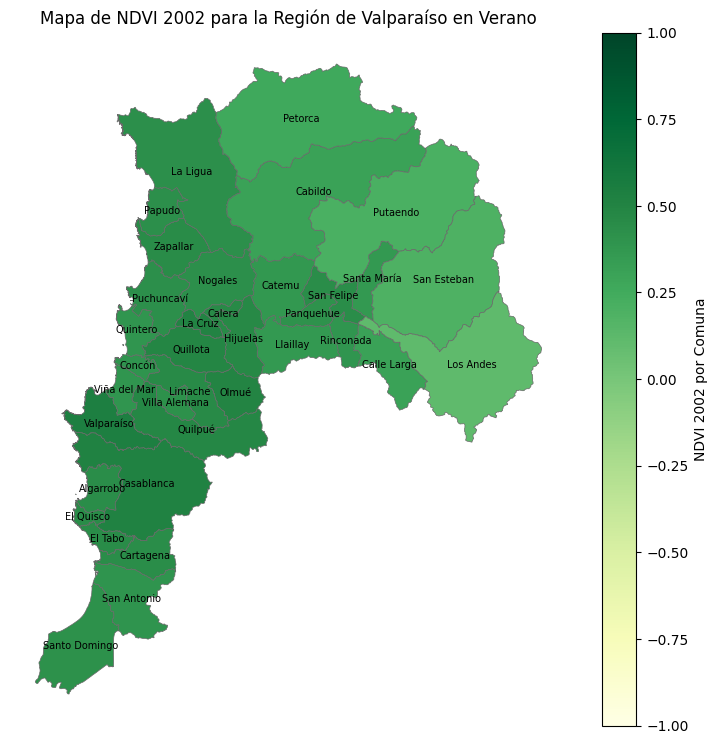

KeyboardInterrupt: 

In [72]:
años = list(range(2002, 2023))

for año in años:
    df_summer_valparaiso_merged_año = df_summer_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_summer_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_summer_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_summer_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_summer_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para la Región de Valparaíso en Verano')
    plt.show()

### Invierno

In [39]:
# Unir los dos dataframes por el código de la comuna
df_winter_valparaiso_merged = gdf.merge(df_winter_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

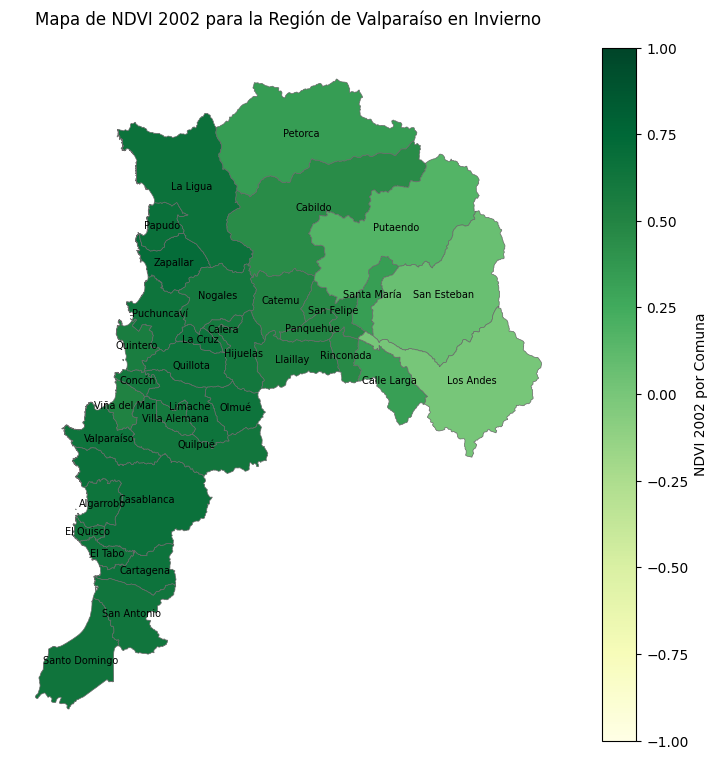

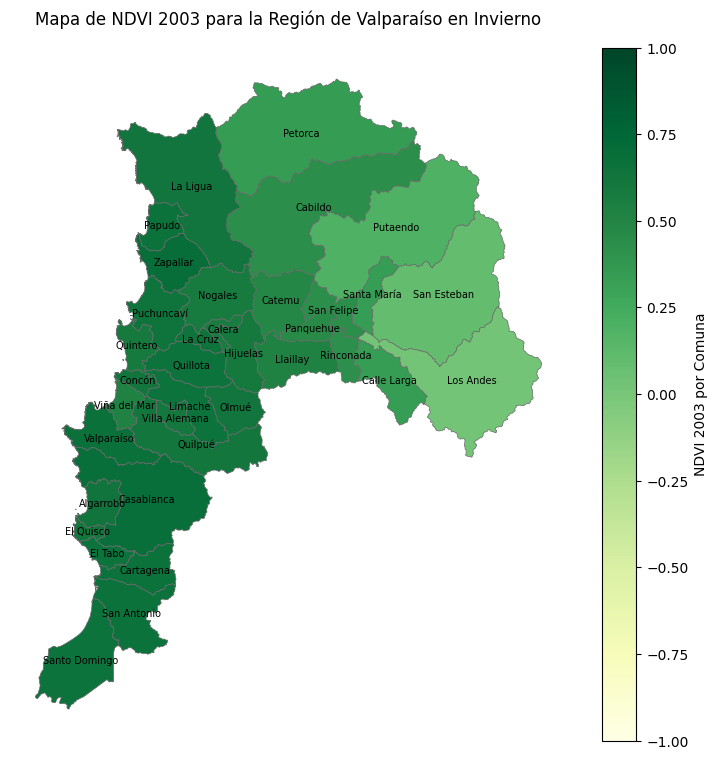

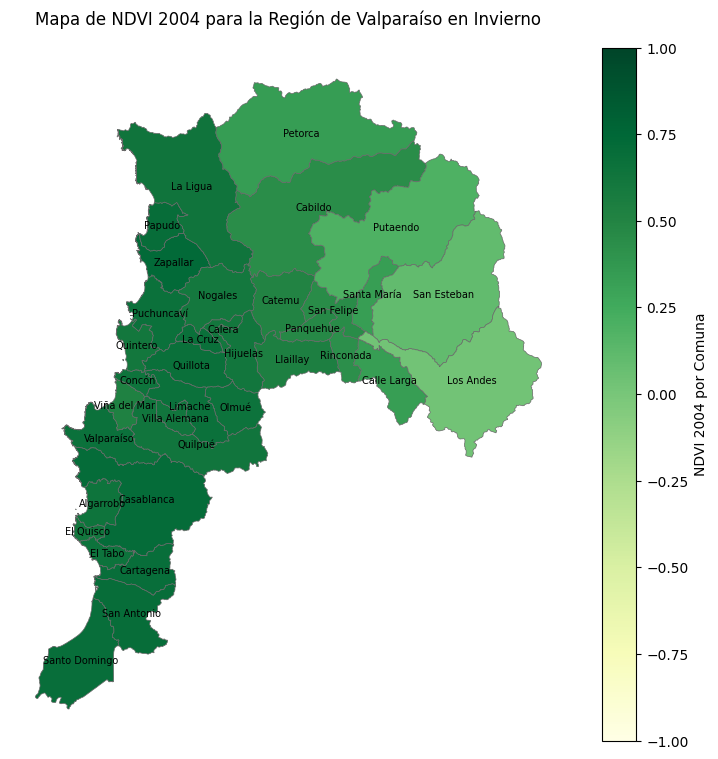

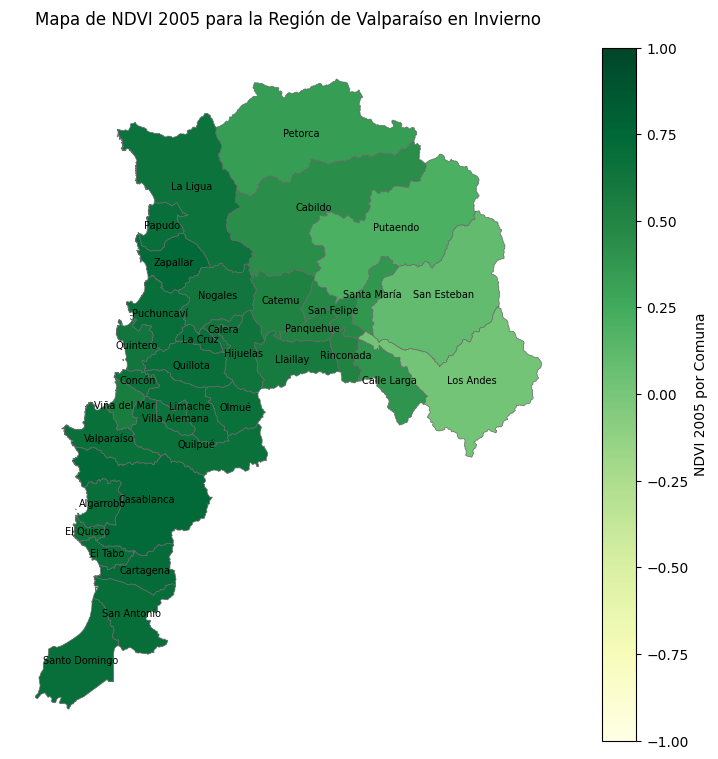

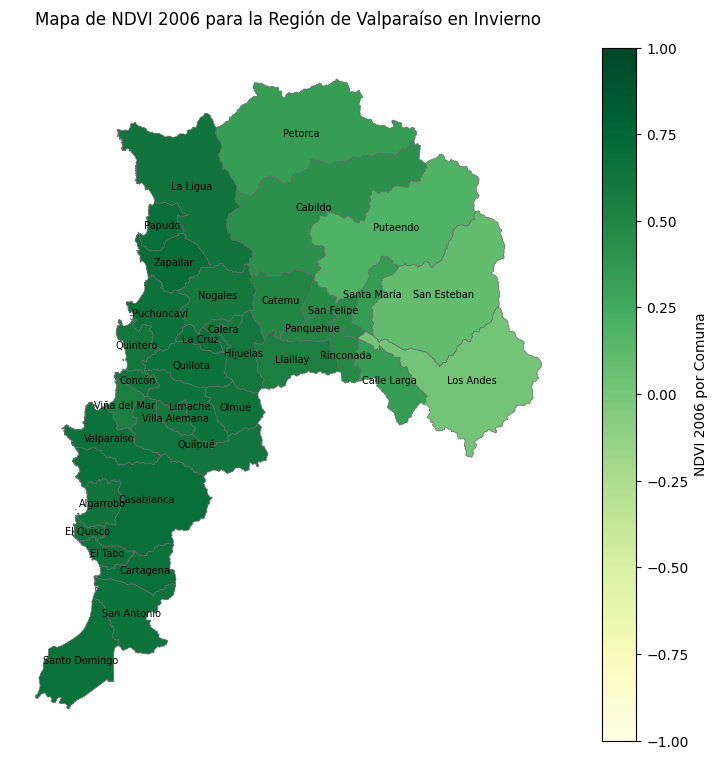

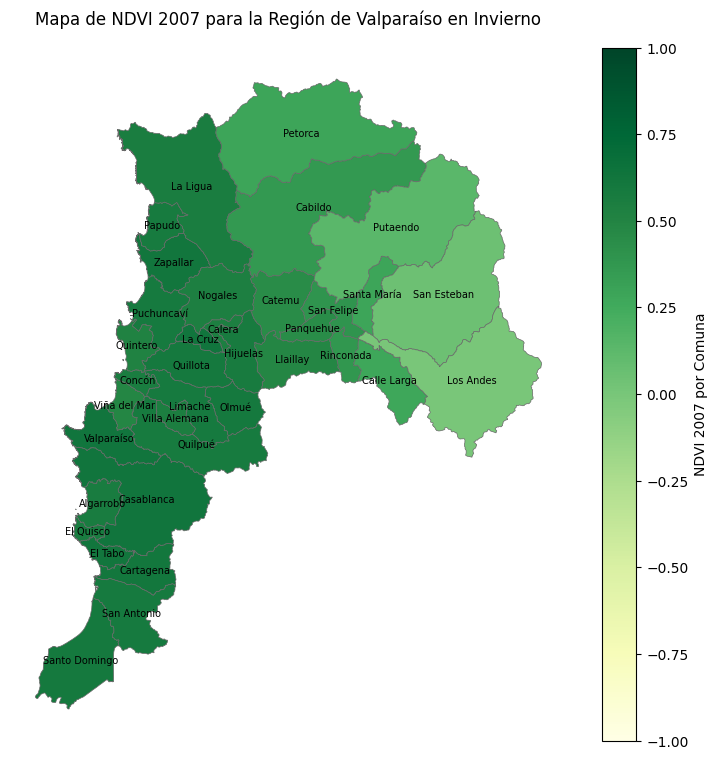

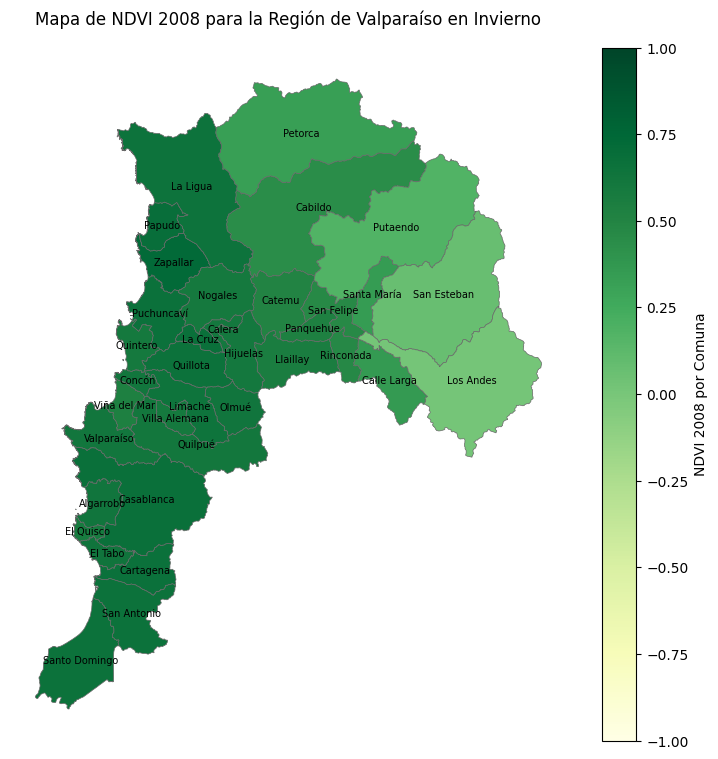

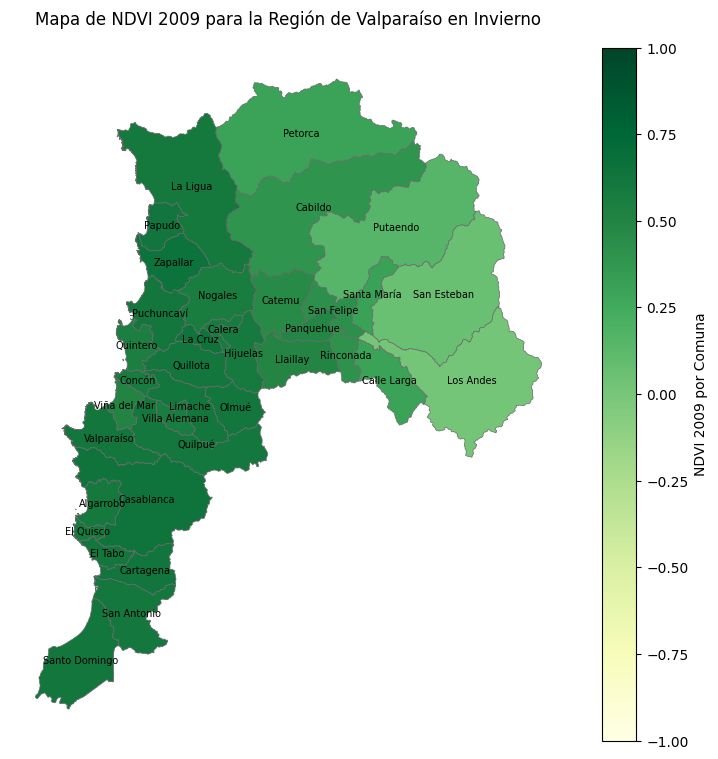

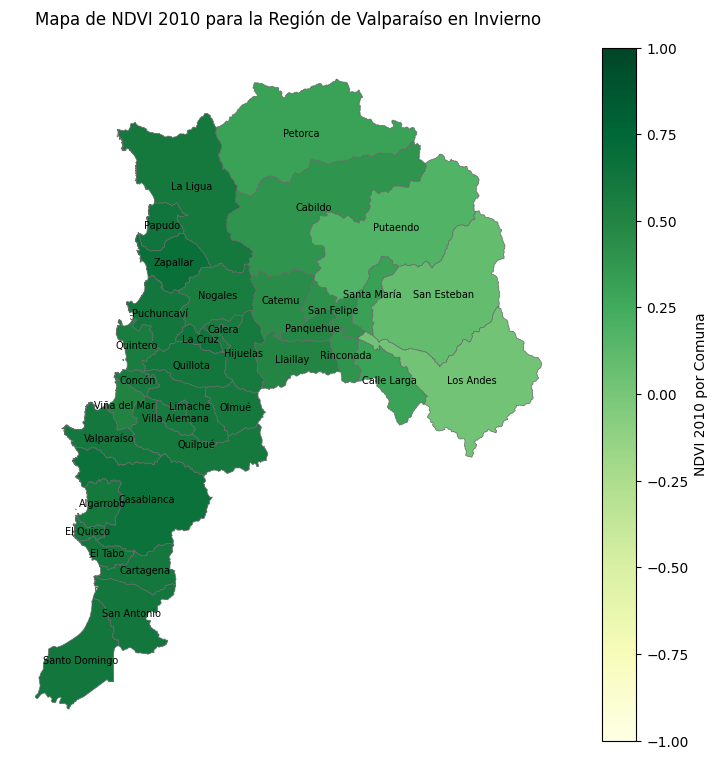

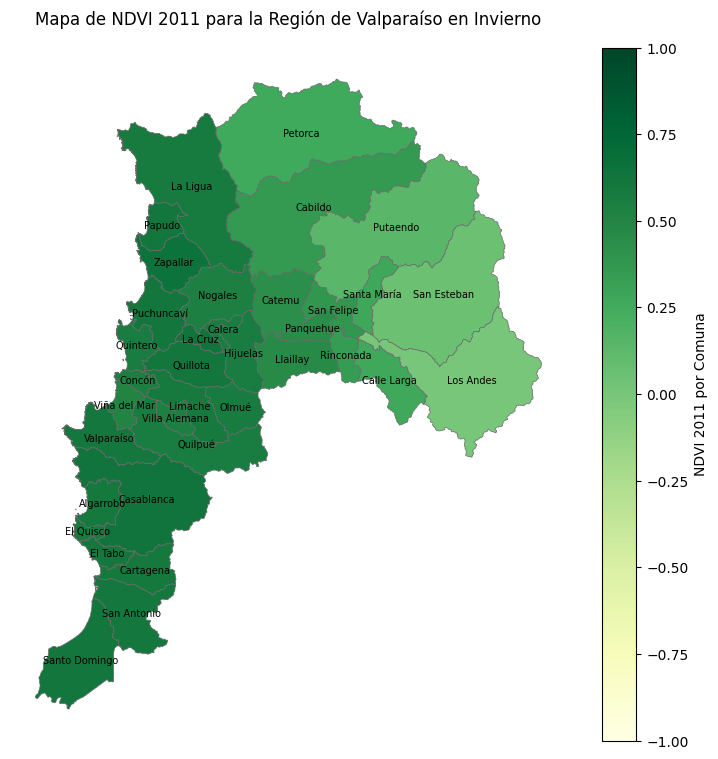

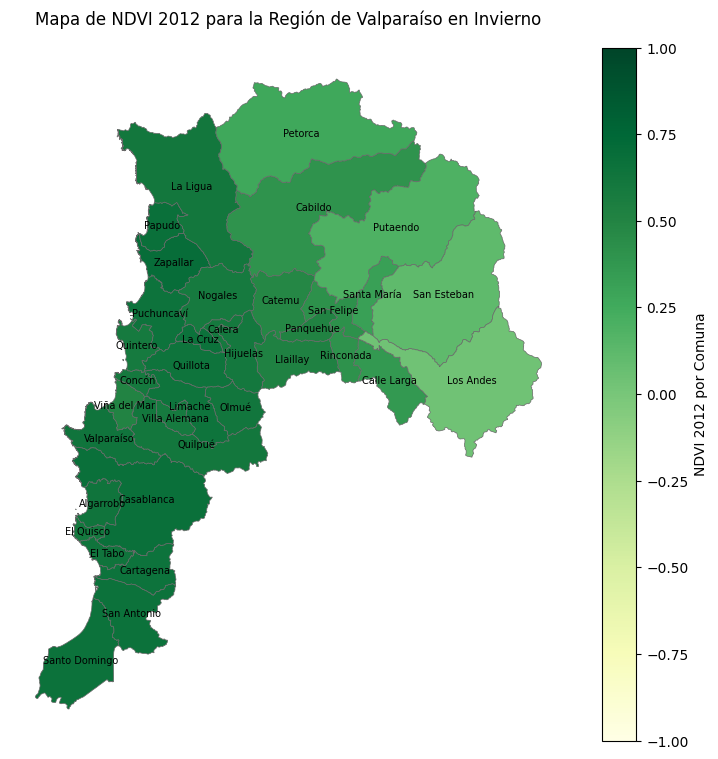

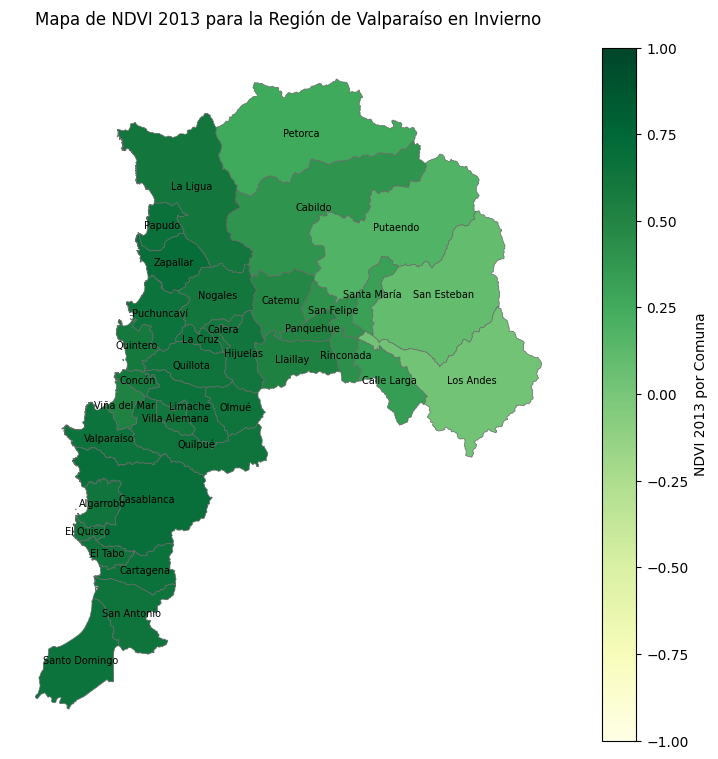

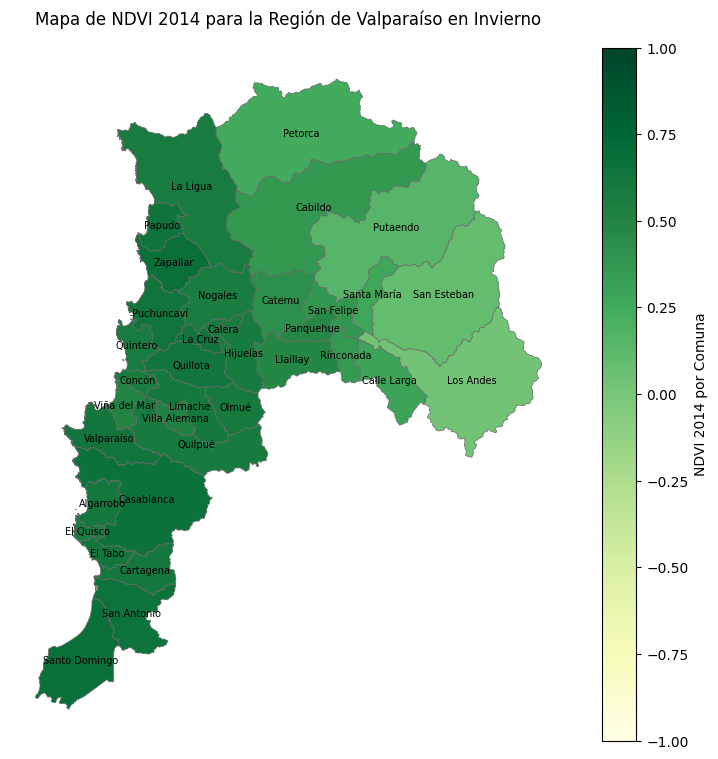

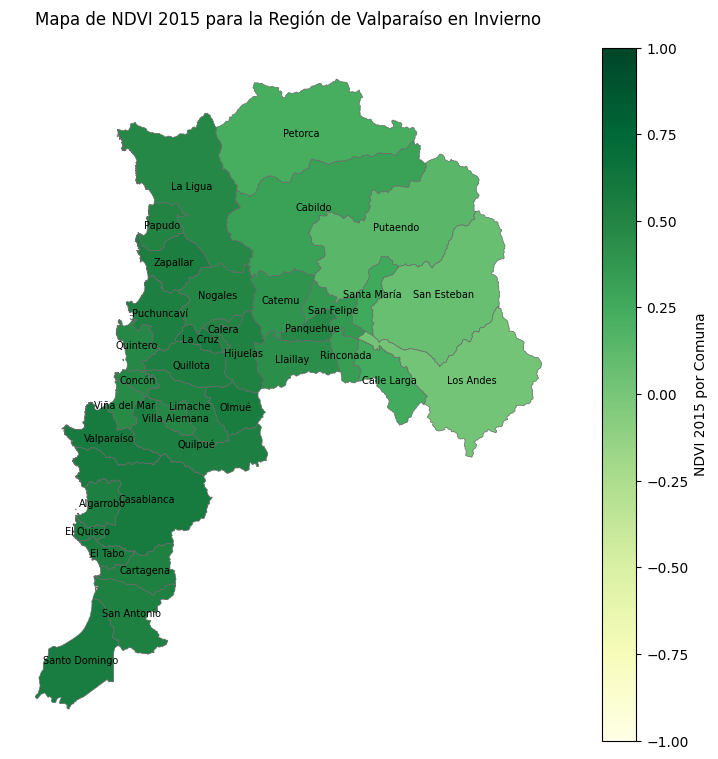

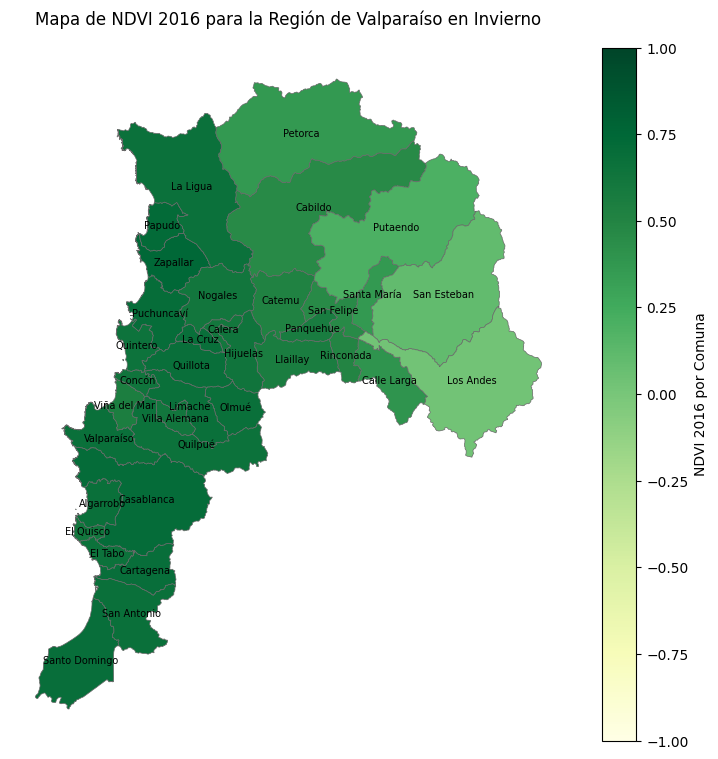

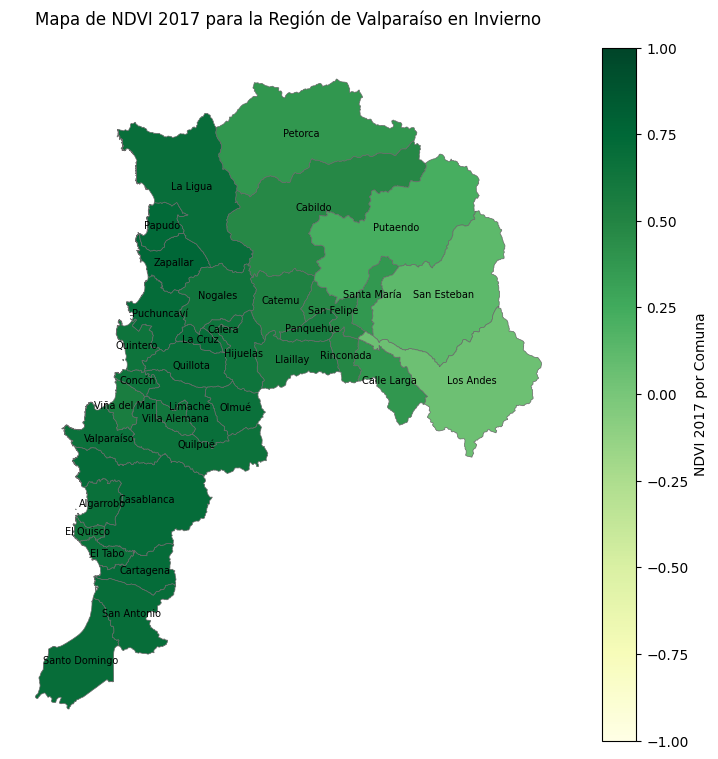

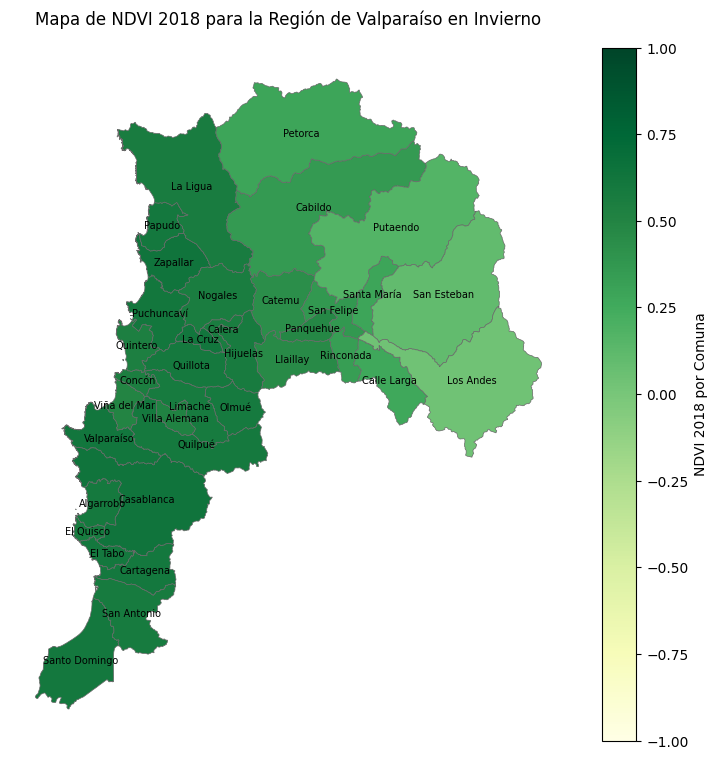

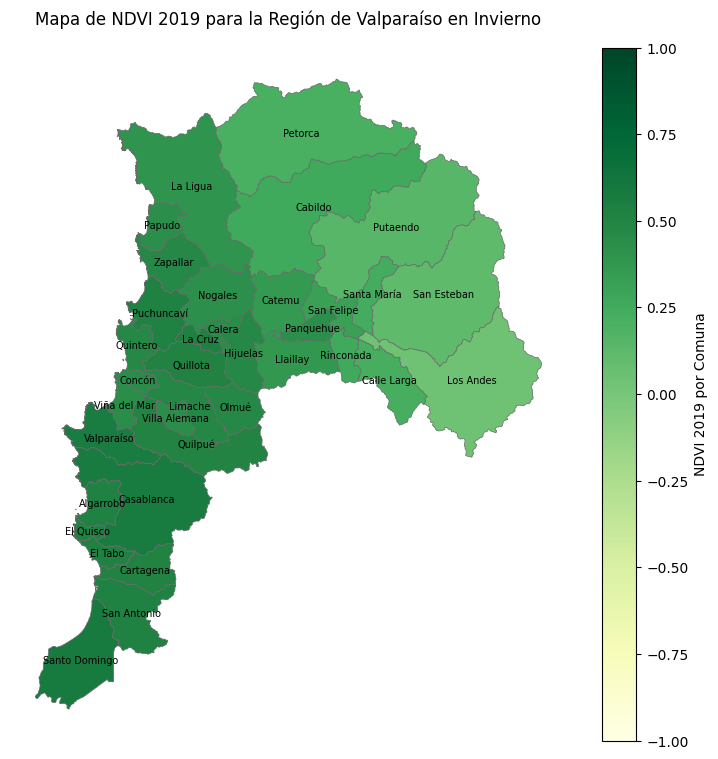

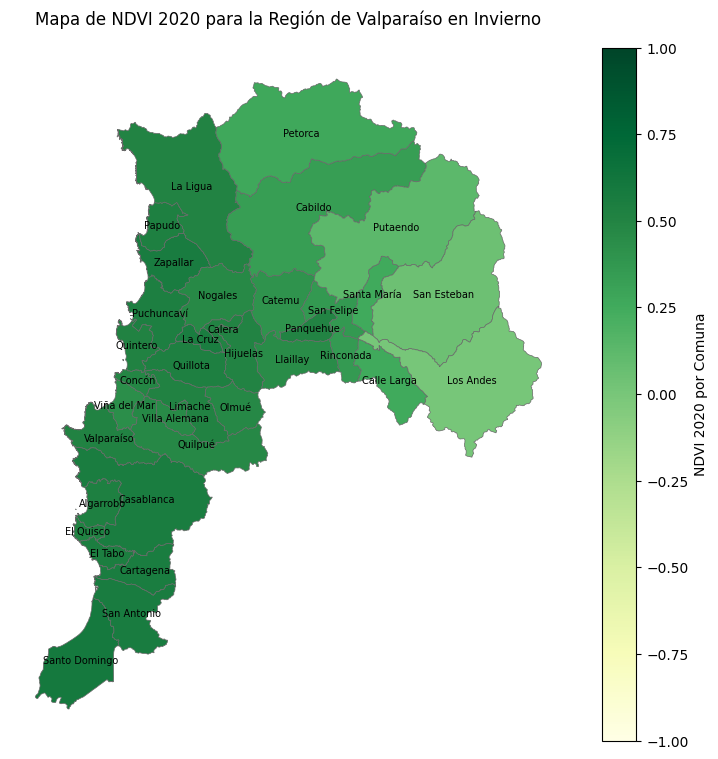

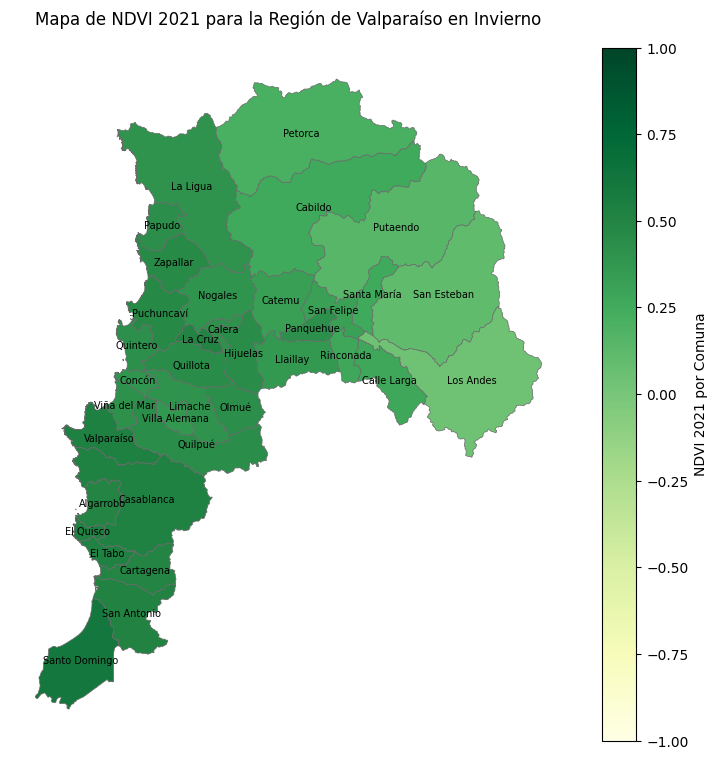

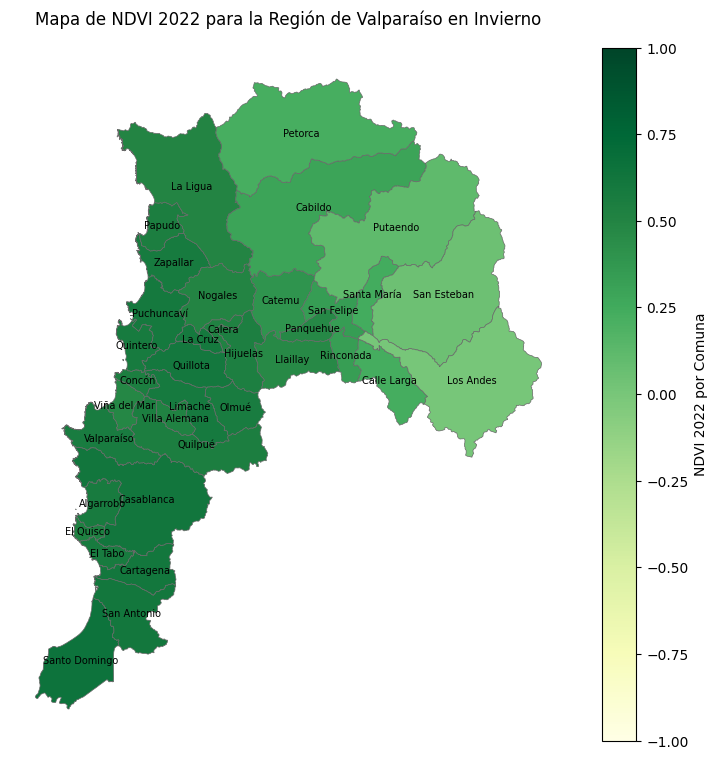

In [40]:
años = list(range(2002, 2023))

for año in años:
    df_winter_valparaiso_merged_año = df_winter_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_winter_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_winter_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_winter_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_winter_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para la Región de Valparaíso en Invierno')
    plt.show()

# Relación con vulnerabilidad

## SOVI
Columnas: name_comuna, cod_com, sovi, vulnerabilidad
* Los datos fueron extraídos, en su mayoría, del Censo 2017; Encuesta de Caracterización Socioeconómica Nacional (CASEN) 2017 y Portal de datos abierto FONASA 2018.
*  -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [8]:
df_sovi = pd.read_csv("SOVI/sovi_datasets.csv",  encoding='utf-8')

In [9]:
df_sovi.head()

,name_comuna,cod_com,sovi,vulnerablidad
0,Iquique,1101,-5.660849,Medio-baja
1,Alto Hospicio,1107,12.583522,Alta
2,Pozo Almonte,1401,8.012849,Medio-alta
3,Camina,1402,33.675857,Alta
4,Colchane,1403,35.729492,Alta


Creamos DataFrame con la intersección entre SOVI y NDVI

In [10]:
# Renombrar la columna 'cod_com' en df_sovi a 'COD_COMUNA'
df_sovi.rename(columns={'cod_com': 'COD_COMUNA'}, inplace=True)

### Verano

In [11]:
df_summer_valparaiso_sovi = pd.merge(df_sovi, df_summer_valparaiso_copy, on='COD_COMUNA', how='inner')


In [12]:
df_summer_valparaiso_sovi.head()

,name_comuna,COD_COMUNA,sovi,vulnerablidad,0_NDVI,1_NDVI,2_NDVI,3_NDVI,4_NDVI,5_NDVI,...,17_NDVI,18_NDVI,19_NDVI,20_NDVI,NOM_COM,NOM_PROV,NOM_REG,MIN,MAX,MEAN
0,Valparaiso,5101,-10.579356,Medio-baja,0.542477,0.532085,0.538777,0.561389,0.557981,0.479661,...,0.377301,0.486670,0.407823,0.480557,Valparaíso,Valparaíso,Valparaíso,0.38,0.56,0.51
1,Casablanca,5102,-6.221885,Medio-baja,0.519514,0.505953,0.521202,0.546584,0.541012,0.459746,...,0.387949,0.478385,0.402630,0.458859,Casablanca,Valparaíso,Valparaíso,0.39,0.55,0.49
2,Concon,5103,-14.610727,Baja,0.392203,0.355820,0.380595,0.401097,0.396111,0.351402,...,0.293149,0.360013,0.281388,0.359144,Concón,Valparaíso,Valparaíso,0.28,0.41,0.36
3,Puchuncavi,5105,-4.775456,Medio-baja,0.425312,0.391143,0.434939,0.465052,0.449210,0.392366,...,0.341092,0.419410,0.331956,0.427697,Puchuncaví,Valparaíso,Valparaíso,0.33,0.48,0.42
4,Quintero,5107,-5.228055,Medio-baja,0.389686,0.367314,0.396314,0.412003,0.403898,0.373625,...,0.312866,0.382671,0.308899,0.375001,Quintero,Valparaíso,Valparaíso,0.31,0.43,0.38


#### Comuna con el mayor y menor NDVI promedio (MEAN)

In [13]:
# Encontrar la fila con el MEAN más alto
max_mean_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['MEAN'].idxmax()]
# Encontrar la fila con el MEAN más bajo
min_mean_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['MEAN'].idxmin()]

# Imprimir los resultados
print("Fila con el MEAN de NDVI más alto:")
print(f"Comuna: {max_mean_row['NOM_COM']}, MEAN NDVI: {max_mean_row['MEAN']}, Vulnerabilidad: {max_mean_row['vulnerablidad']}, SOVI:{max_mean_row['sovi']} ")

print("\nFila con el MEAN de NDVI más bajo:")
print(f"Comuna: {min_mean_row['NOM_COM']}, MEAN NDVI: {min_mean_row['MEAN']}, Vulnerabilidad: {min_mean_row['vulnerablidad']}, SOVI:{min_mean_row['sovi']} ")

Fila con el MEAN de NDVI más alto:
Comuna: La Cruz, MEAN NDVI: 0.52, Vulnerabilidad: Medio-baja, SOVI:-9.18856872774627 

Fila con el MEAN de NDVI más bajo:
Comuna: Los Andes, MEAN NDVI: 0.13, Vulnerabilidad: Medio-baja, SOVI:-10.1541721117887 


#### Relación entre SOVI y NDVI Promedio en Verano en las comunas de la Región de Valparaísio

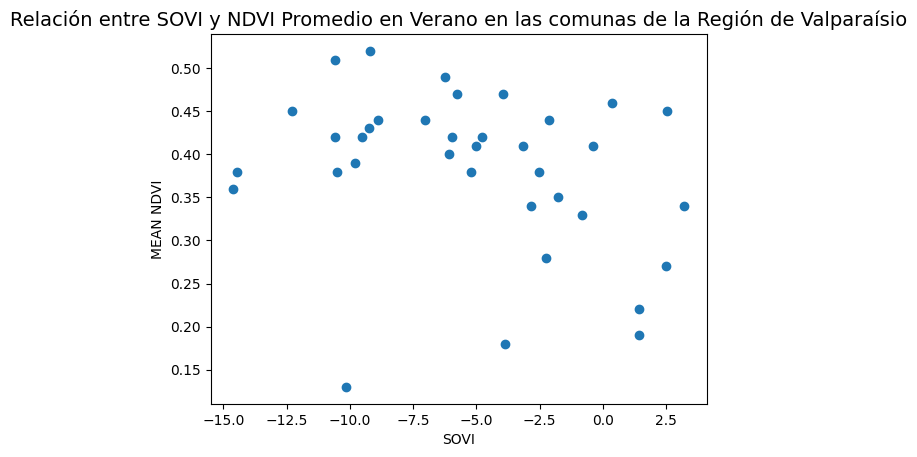

In [74]:
fig, ax = plt.subplots()
ax.scatter(df_summer_valparaiso_sovi.sovi, df_summer_valparaiso_sovi.MEAN)
# Nombres de los ejes
ax.set_xlabel('SOVI')
ax.set_ylabel('MEAN NDVI')
plt.title('Relación entre SOVI y NDVI Promedio en Verano en las comunas de la Región de Valparaísio', fontsize=14)
plt.show()

##### Comuna con mayor y menor SOVI
* Recordar: -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [62]:
# Encontrar la fila con el sovi más alto
max_sovi_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['sovi'].idxmax()]
# Encontrar la fila con el sovi más bajo
min_sovi_row = df_summer_valparaiso_sovi.loc[df_summer_valparaiso_sovi['sovi'].idxmin()]

# Imprimir los resultados
print("Fila con SOVI más alto (mayor vulnerabilidad):")
print(f"Comuna: {max_sovi_row['NOM_COM']},  SOVI:{max_sovi_row['sovi']}, MEAN NDVI: {max_sovi_row['MEAN']}, Vulnerabilidad: {max_sovi_row['vulnerablidad']}")

print("\nFila con SOVI más bajo (menor vulnerabilidad):")
print(f"Comuna: {min_sovi_row['NOM_COM']},  SOVI:{min_sovi_row['sovi']}, MEAN NDVI: {min_sovi_row['MEAN']}, Vulnerabilidad: {min_sovi_row['vulnerablidad']}")

Fila con SOVI más alto (mayor vulnerabilidad):
Comuna: Catemu,  SOVI:3.21051317224034, MEAN: 0.34, Vulnerabilidad: Medio-alta

Fila con SOVI más bajo (menor vulnerabilidad):
Comuna: Concón,  SOVI:-14.6107269939586, MEAN: 0.36, Vulnerabilidad: Baja


### Invierno

In [60]:
df_winter_valparaiso_sovi = pd.merge(df_sovi, df_winter_valparaiso_copy, on='COD_COMUNA', how='inner')

#### Comuna con el mayor y menor NDVI promedio (MEAN)

In [61]:
# Encontrar la fila con el MEAN más alto
max_mean_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['MEAN'].idxmax()]
# Encontrar la fila con el MEAN más bajo
min_mean_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['MEAN'].idxmin()]

# Imprimir los resultados
print("Fila con el MEAN de NDVI más alto:")
print(f"Comuna: {max_mean_row['NOM_COM']}, MEAN: {max_mean_row['MEAN']}, Vulnerabilidad: {max_mean_row['vulnerablidad']}, SOVI:{max_mean_row['sovi']} ")

print("\nFila con el MEAN de NDVI más bajo:")
print(f"Comuna: {min_mean_row['NOM_COM']}, MEAN: {min_mean_row['MEAN']}, Vulnerabilidad: {min_mean_row['vulnerablidad']}, SOVI:{min_mean_row['sovi']} ")

Fila con el MEAN de NDVI más alto:
Comuna: Zapallar, MEAN: 0.655, Vulnerabilidad: Medio-baja, SOVI:-10.6052954942477 

Fila con el MEAN de NDVI más bajo:
Comuna: Los Andes, MEAN: 0.023, Vulnerabilidad: Medio-baja, SOVI:-10.1541721117887 


#### Relación entre SOVI y NDVI Promedio en Invierno en las comunas de la Región de Valparaísio

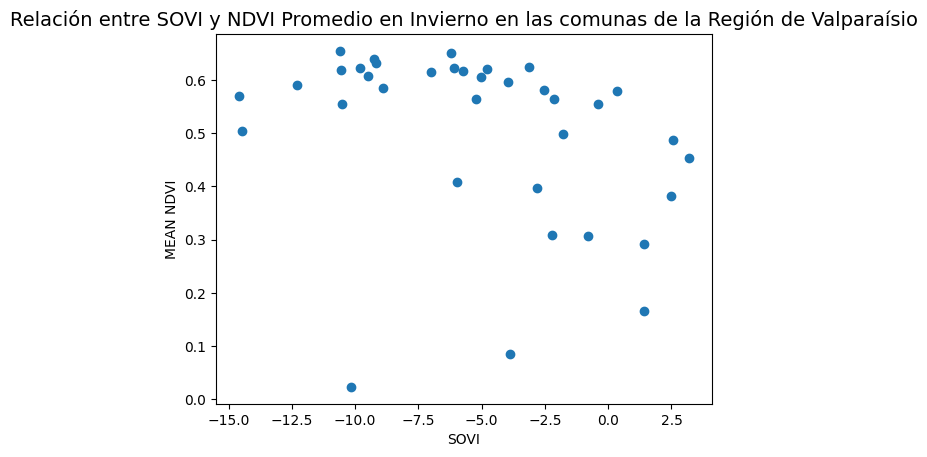

In [76]:
fig, ax = plt.subplots()
ax.scatter(df_winter_valparaiso_sovi.sovi, df_winter_valparaiso_sovi.MEAN)
# Nombres de los ejes
ax.set_xlabel('SOVI')
ax.set_ylabel('MEAN NDVI')
plt.title('Relación entre SOVI y NDVI Promedio en Invierno en las comunas de la Región de Valparaísio', fontsize=14)
plt.show()

##### Comuna con mayor y menor SOVI
* Recordar: -1.5DE (vulnerabilidad baja) y +1DE (vulnerabilidad alta)

In [63]:
# Encontrar la fila con el sovi más alto
max_sovi_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['sovi'].idxmax()]
# Encontrar la fila con el sovi más bajo
min_sovi_row = df_winter_valparaiso_sovi.loc[df_winter_valparaiso_sovi['sovi'].idxmin()]

# Imprimir los resultados
print("Fila con SOVI más alto (mayor vulnerabilidad):")
print(f"Comuna: {max_sovi_row['NOM_COM']},  SOVI:{max_sovi_row['sovi']}, MEAN NDVI: {max_sovi_row['MEAN']}, Vulnerabilidad: {max_sovi_row['vulnerablidad']}")

print("\nFila con SOVI más bajo (menor vulnerabilidad):")
print(f"Comuna: {min_sovi_row['NOM_COM']},  SOVI:{min_sovi_row['sovi']}, MEAN NDVI: {min_sovi_row['MEAN']}, Vulnerabilidad: {min_sovi_row['vulnerablidad']}")

Fila con SOVI más alto (mayor vulnerabilidad):
Comuna: Catemu,  SOVI:3.21051317224034, MEAN NDVI: 0.453, Vulnerabilidad: Medio-alta

Fila con SOVI más bajo (menor vulnerabilidad):
Comuna: Concón,  SOVI:-14.6107269939586, MEAN NDVI: 0.57, Vulnerabilidad: Baja


## Nacimientos en la Región de Valparaíso
Estos datos son de 1992-2020

In [50]:
df_nacimientos = pd.read_csv("births_valparaiso_1992_2020/births_valparaiso.csv",  encoding='utf-8')
# Filtrar los nacimientos que están entre 2002 y 2021 (inclusive)
df_nacimientos['year_nac'] = pd.to_numeric(df_nacimientos['year_nac'], errors='coerce')
df_nacimientos = df_nacimientos[(df_nacimientos['year_nac'] >= 2002)]

In [51]:
df_nacimientos.head()

,id,com,name_com,reg,name_reg,weeks,date_nac,day_nac,month_nac,year_nac,...,job_group_mom,age_group_dad,educ_group_dad,job_group_dad,birth_preterm,birth_very_preterm,birth_moderately_preterm,birth_late_preterm,birth_term,birth_posterm
24,4123,5109,Vina del Mar,5,Valparaiso,38,2008-04-25,25,4,2008,...,Not working,Unknown,Unknown,Unknown,0,0,0,0,1,0
26,9598,5101,Valparaiso,5,Valparaiso,40,2008-02-19,19,2,2008,...,Not working,Unknown,Unknown,Unknown,0,0,0,0,1,0
34,32082,5802,Limache,5,Valparaiso,38,2008-02-29,29,2,2008,...,Not working,30-39,Secondary,Employed,0,0,0,0,1,0
36,34548,5101,Valparaiso,5,Valparaiso,31,2008-05-11,11,5,2008,...,Not working,20-29,Secondary,Employed,1,1,0,0,0,0
327,69000,5501,Quillota,5,Valparaiso,39,2008-07-01,1,7,2008,...,Employed,Unknown,Unknown,Unknown,0,0,0,0,1,0


In [52]:
# Renombrar la columna 'cod_com' en df_sovi a 'COD_COMUNA'
df_nacimientos.rename(columns={'name_com': 'NOM_COM'}, inplace=True)

In [53]:
from unidecode import unidecode
df_summer_valparaiso_sovi['NOM_COM'] = df_summer_valparaiso_sovi['NOM_COM'].apply(lambda x: unidecode(x))
df_nacimientos['NOM_COM'] = df_nacimientos['NOM_COM'].apply(lambda x: unidecode(x))